#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Syed Jafrul Husen<br>
<b>Reg. No:</b> 170103020013

### Assignment 4: Radial Basis Function Network

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import numpy as np

<b>Dataset</b> <br>
Here,<br>
Training data shape is (NxD) 

In [2]:
np.random.seed(50)
X, y = make_moons(n_samples=500, noise=0.1)

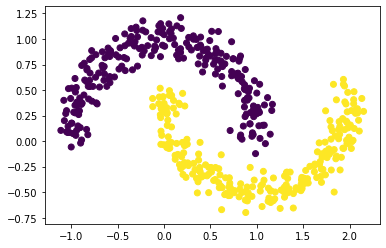

In [3]:
plt.scatter(X[:,0], X[:,1] ,c=y )

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
print('Train shape: ', X_train.shape, y_train.shape)
print('Test shape: ',X_test.shape, y_test.shape)

Train shape:  (400, 2) (400,)
Test shape:  (100, 2) (100,)


<b>Task 1: Calculate Hidden Neuron Centroids</b>

K=12 <br>
Calculate Centroids using K-Means. <br>
Centroids shape should be (KxD) <br>
Print and plot the centroids with the data.

In [5]:
#your code goes here.

import collections 
from collections import defaultdict
def euclidianDistance(arr,c):
    n = len(c)
    d = 0
    for i in range(n):
        d = d + ((arr[i]-c[i])**2)
    return np.sqrt(d)

In [6]:
def grouping(xx,K,center):
    grp = defaultdict(list)
    mn = np.zeros(K)
    sz = len(xx)
    for i in range(sz):
        data = xx[i]
        for j in range(K):
            mn[j] = euclidianDistance(data,center[j])
        idx = 0
        for j in range(K):
            if(mn[j]<mn[idx]):
                idx = j
        grp[idx].append(data)
    return grp

In [7]:
def average(grp,idx,xx):
    GRP = np.array(grp)
    #print(GRP.shape)
    sz = len(GRP)
    left=0
    right=0
    n = len(GRP[0])
    c = np.zeros([n])
    for i in range(sz):
        t = GRP[i]
        for j in range(n):
            c[j] = c[j]+t[j]
    if(sz!=0):
        for j in range(n):
            c[j] = c[j]/sz
    else:
        temp = np.random.choice(idx)
        for j in range(n):
            c[j] = xx[temp][j]
    return c

In [8]:
def K_Means(K,xx):
    idx = []
    for i in range(len(xx)):
        idx.append(i)
    center=[]
    center2=[]
    
    for i in range(K):
        c = np.random.choice(idx)
        center.append(xx[c])
        center2.append(xx[c])
    center=np.array(center)
    center2=np.array(center2)
    
    for itr in range(10000):
        grp = grouping(xx,K,center)
        
        for i in range(K):
            n = len(grp[i])
            g = []
            for j in range(n):
                g.append(grp[i][j])
            t = average(g,idx,xx)
            n = len(t)
            for j in range(n):
                center[i][j] = t[j]
            
        for i in range(K):
            n = len(grp[i])
            g = []
            for j in range(n):
                g.append(grp[i][j])
            t = average(g,idx,xx)
            n = len(t)
            for j in range(n):
                center2[i][j] = t[j]
            
        c = 0
        for i in range(K):
            n = len(center[i])
            for j in range(n):
                if(center[i][j]==center2[i][j]):
                    ++c
        if(c==K*len(center[0])):
            break
    return center

In [9]:
def plot_K_Means(X,center,K):
    plt.scatter(X[:,0],X[:,1],c = y)
    colmap = {0: 'r', 1: 'g', 2: 'y', 3:'b'}
    for i in range(K):
        plt.scatter(center[i][0], center[i][1], color=colmap[0])
    plt.show()

In [10]:
K = 12
center = K_Means(K,X)
print(center)

[[ 1.96423436  0.21801259]
 [ 0.08772333  0.99391237]
 [ 0.06456841  0.18197008]
 [-0.3637366   0.92637095]
 [ 0.60074963  0.79226447]
 [ 0.95199627  0.28969526]
 [ 1.12084659 -0.47453951]
 [-0.96972593  0.09358721]
 [-0.92578789  0.38274178]
 [ 1.66424224 -0.26431484]
 [-0.71018453  0.68565518]
 [ 0.47223449 -0.34205243]]


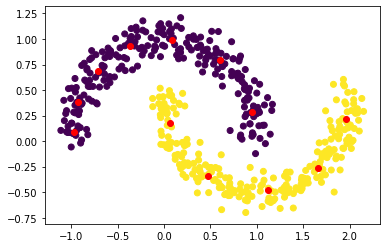

In [11]:
plot_K_Means(X,center,K)

<b>Task 2: Calculate sigma value</b> <br>
The value of sigma is chosen according to maximum distance “d” between two hidden neurons
$$\sigma=\frac{d}{\sqrt{2k}}$$
where, d=maximum distance between two hidden centers. k=number of hidden neuron.

In [12]:
#your code goes here.
d = 0
for i in range(K):
    for j in range(i,K):
        t = euclidianDistance(center[i],center[j])
        if(t>d):
            d = t
sigma = d/np.sqrt(2*K)
print('sigma = ',sigma)

sigma =  0.5994304475366574


<b>Task 3: Calculate Hidden Layer Activation</b> <br>
Here we use Gaussian function, $\mu$ is a receptor or cluster center.
radial distance, $$ r=||x-\mu|| $$
$$ \sigma =variance $$ [variance=spread of radial function]


$$\phi(x,\mu)=\frac{-||x-\mu||^2}{2\sigma^2}$$

Hidden layer activation, G shape should be (NxK)

In [13]:
#your code goes here.
n = len(X_train)
G_train = np.zeros([n,K])
print(G_train.shape)
for i in range(n):
    for j in range(K):
        G_train[i][j] = np.exp(-1*(euclidianDistance(X_train[i],center[j])**2 )/(2*sigma*sigma))
print(G_train)

(400, 12)
[[5.20933634e-06 7.75939780e-02 2.11400267e-01 ... 4.15836928e-05
  6.22687312e-01 3.48761030e-02]
 [2.77535682e-05 2.13398015e-01 3.51877104e-01 ... 1.38420676e-04
  8.80781751e-01 5.41221405e-02]
 [3.28337839e-03 7.12582397e-01 8.41918053e-01 ... 7.47773858e-03
  5.15355503e-01 2.48016391e-01]
 ...
 [2.56997255e-01 7.14462746e-03 7.37068661e-02 ... 7.50209215e-01
  6.70691109e-04 4.07686622e-01]
 [9.90689617e-01 4.50374326e-03 9.83700119e-03 ... 6.99794518e-01
  5.96344708e-05 4.15901565e-02]
 [1.77323455e-04 6.92694636e-01 3.27858751e-01 ... 3.17844570e-04
  8.18282620e-01 3.41657575e-02]]


<b>Task 4: Train Weights</b> <br>
Let, rbf transformed data=G, weights=W and targets=A <br>
$$G.W=A$$ <br>
so, $$W=G^{-1}A$$ 

W shape should be (Kx1)

In [14]:
#your code goes here.
from scipy import *
from scipy.linalg import norm, pinv
w = dot(pinv(G_train), y_train)
print(w)

[ 1.32604865 -4.21378353  1.68566554  6.03062276  2.2885952  -2.33561647
  1.51322949 -3.82813087  7.67819119 -0.19697439 -8.10444734  0.04614302]


C:\Users\Syed Jafrul Husen\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  after removing the cwd from sys.path.


<b>Task 5: Classification accuracy</b> <br>
Now, classify the test data using the learned Hidden layer (centroids, sigma) and learned weights <br>
Accuracy should be greater than 95%

$G= rbf (Test_NxK) $ <br>
$A=G.W$

Use 0.5 as threshold.

In [15]:
#your code goes here.
n = len(X_test)
G_test = np.zeros([n,K])
print(G_test.shape)
for i in range(n):
    for j in range(K):
        G_test[i][j] = np.exp(-1*(euclidianDistance(X_test[i],center[j])**2 )/(2*sigma*sigma))
#print(G_test)
y_predict = np.dot(G_test,w)
#print(y_predict)

accuracy = 0
for i in range(len(y_predict)):
    if(y_predict[i]>0.5):
        y_predict[i] = 1
    else:
        y_predict[i] = 0
    if(y_predict[i]==y_test[i]):
        accuracy = accuracy + 1
accuracy = (accuracy/len(y_predict))*100
print('Accuracy = ',accuracy,'%')
#print(y_predict)
#print(y_test)


(100, 12)
Accuracy =  100.0 %


<b>Bonus Task: Plot decision boundary</b>

In [16]:
#your code goes here.

<b>1D Interpolation</b>

In [17]:
N=100
x = np.linspace(0, 10, N)
noise = np.random.uniform(-0.1, 0.1, N)
y = np.sin(x) +noise
x=x.reshape(-1,1)
x.shape

(100, 1)

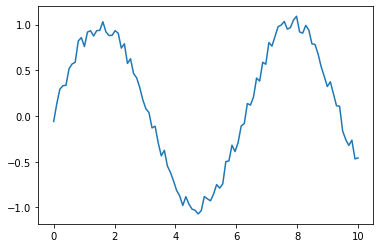

In [18]:
plt.plot(x,y)

<b>Task 6: Interpolation</b><br>
k=10 <br>

* calculate centroids, sigma (you can also use k random centroids, see what happens)
* calculate Hidden layer
* calculate weights
* predict $\hat{y}$
* plot the predicted $\hat{y}$ and actual $y$

In [19]:
#your code goes here.
def euclidianDistance2(arr,c):
    return np.sqrt( ((arr[0]-c[0])*(arr[0]-c[0])) )

def grouping2(X,K,center):
    grp = defaultdict(list)
    mn = np.zeros(K)
    sz = len(X)
    for i in range(sz):
        data = X[i]
        for j in range(K):
            mn[j] = euclidianDistance2(data,center[j])
        idx = 0
        for j in range(K):
            if(mn[j]<mn[idx]):
                idx = j
        grp[idx].append(data)
    return grp

def average2(grp,idx):
    GRP = np.array(grp)
    sz = len(GRP)
    left=0
    right=0
    for i in range(sz):
        t = GRP[i]
        left+=t[0]
    if(sz!=0):
        c = [left/sz]
    else:
        temp = np.random.choice(idx)
        c = X[temp]
    return c

def K_Means2(K,X):
    idx = []
    for i in range(len(X)):
        idx.append(i)
    center=[]
    center2=[]
    
    for i in range(K):
        c = np.random.choice(idx)
        center.append(X[c])
        center2.append(X[c])
    center=np.array(center)
    center2=np.array(center2)
    
    for itr in range(10000):
        grp = grouping2(X,K,center)
        
        for i in range(K):
            n = len(grp[i])
            g = []
            for j in range(n):
                g.append(grp[i][j])
            t = average2(g,idx)
            center[i][0] = t[0]
            
        for i in range(K):
            n = len(grp[i])
            g = []
            for j in range(n):
                g.append(grp[i][j])
            t = average2(g,idx)
            center2[i][0] = t[0]
            
        c = 0
        for i in range(K):
            if(center[i][0]==center2[i][0]):
                ++c
        if(c==K):
            break
    return center

K = 10
center = K_Means2(K,x)
print(center)

[[1.26262626]
 [2.32323232]
 [3.33333333]
 [5.85858586]
 [0.35353535]
 [9.34343434]
 [5.        ]
 [8.03030303]
 [6.86868687]
 [4.19191919]]


IndexError: invalid index to scalar variable.

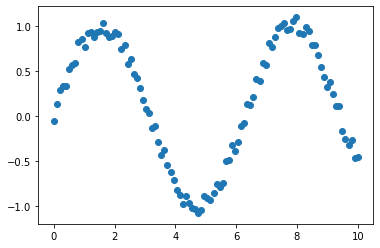

In [20]:
plt.scatter(x,y)
colmap = {0: 'r', 1: 'g', 2: 'y', 3:'b'}
for i in range(K):
    plt.scatter(center[i],t[i],color=colmap[0])
plt.show()

In [ ]:
#your code goes here.
d = 0
for i in range(K):
    for j in range(i,K):
        t = euclidianDistance(center[i],center[j])
        if(t>d):
            d = t
sigma = d/np.sqrt(2*K)
print('sigma = ',sigma)

In [21]:
#your code goes here.
n = len(x)
G = np.zeros([n,K])
print(G.shape)
for i in range(n):
    for j in range(K):
        G[i][j] = np.exp(-1*(euclidianDistance(x[i],center[j])**2 )/(2*sigma*sigma))
#print(G)

(100, 10)


In [22]:
w = dot(pinv(G), y)
print(w)

[ 0.81271611  0.57208365 -0.09213833 -0.30979585  0.07262411 -0.1159685
 -0.60192996  1.05588087  0.45509745 -0.60817858]


C:\Users\Syed Jafrul Husen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  """Entry point for launching an IPython kernel.


In [23]:
#your code goes here.
y_predict = np.dot(G,w)

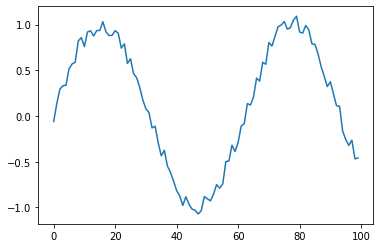

In [24]:
plt.plot(y)

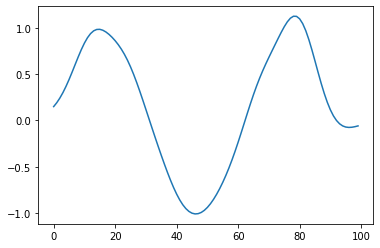

In [25]:
plt.plot(y_predict)

<b>Task 7: Test Interpolation </b>

Calculate output for the following, <br>
tx=np.array([4,7,10])  <br>
Output should be near [-0.74,  0.64, -0.55] <br>

In [26]:
#your code goes here.
tx = np.array([4,7,10])
n = len(tx)
G_test = np.zeros([n,K])
#print(G_test.shape)
for i in range(n):
    for j in range(K):
        G_test[i][j] = np.exp(-1*(euclidianDistance([tx[i]],center[j])**2 )/(2*sigma*sigma))
#print(G_test)
y_predict = np.dot(G_test,w)
print(y_predict)


[-0.76819625  0.63243362 -0.05887828]


### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>Syed Jafrul Husen</u> bearing registration no. <u>170103020013</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>Syed Jafrul Husen</u><br>
Date: <u>07/08/2020</u>

_your__writing_